In [377]:
from matplotlib import pyplot as plt
import sympy as sp
import numpy as np

In [378]:
#define functions for demand and supply
def demand(p):
    return (500-p)/3.2
def supply(p, t):
    return ((100+p)/4.3) + t

#make supply = demand
p,t = sp.symbols('p t', real=True, positive=True)
equ = sp.Eq(demand(p), supply(p,t))
equ

Eq(156.25 - 0.3125*p, 0.232558139534884*p + t + 23.2558139534884)

In [379]:
#find equilibrium price
x_eq=sp.solve(equ, p)
print(x_eq[0])

#find equilibrium quantity
p_eq=demand(x_eq[0])
print(p_eq)

244.0 - 1.83466666666667*t
0.573333333333333*t + 80.0


In [380]:
producer=sp.integrate(p_eq-supply(p, t),(p,0,x_eq))
consumer=sp.integrate(demand(p)-p_eq,(p,0,x_eq))
welfare=(sp.integrate(demand(p)-supply(p, t),(p,0,x_eq)))
avprov = sp.integrate(t, (p, 0, x_eq))

print(f"""    
Produdusentoverskudd uten gitt t verdi:{sp.simplify(producer)}\n
Konsumentoversludd uten gitt t verdi:{sp.simplify(consumer)}\n
Samfunnsoverskuddet uten gitt t verdi:{sp.simplify(welfare)}\n
Avgiftsproveny utifra avgift t er:{avprov}
""")

    
Produdusentoverskudd uten gitt t verdi:0.391395555555555*t**2 - 104.106666666667*t + 6922.79069767442

Konsumentoversludd uten gitt t verdi:0.525937777777778*t**2 - 139.893333333333*t + 9302.5

Samfunnsoverskuddet uten gitt t verdi:0.917333333333333*t**2 - 244.0*t + 16225.2906976744

Avgiftsproveny utifra avgift t er:t*(244.0 - 1.83466666666667*t)



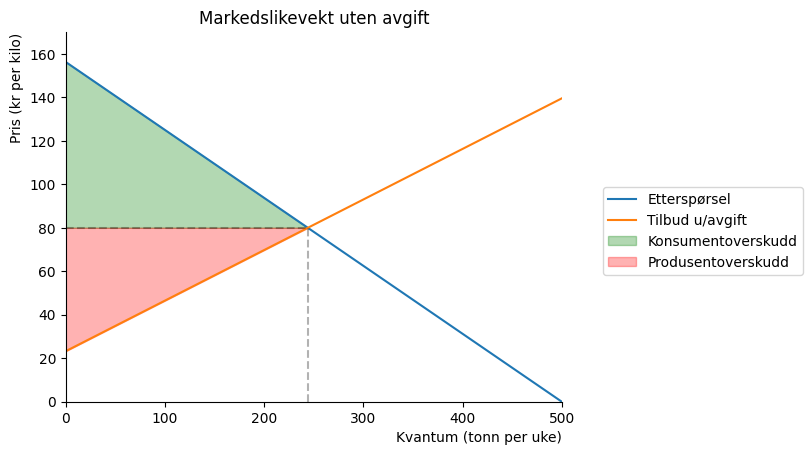

In [381]:
x_num=np.linspace(0.1,500,100)
equ_t0 = sp.Eq(demand(p),supply(p, 0))

x_eq_t0 = sp.solve(equ_t0,p)
x_eq_t0 = float(x_eq_t0[0])
p_eq_t0=demand(x_eq_t0)

#create figure and ax
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (kr per kilo)', loc='top')
                ax.set_xlabel('Kvantum (tonn per uke)', loc='right')
                ax.set(xlim=(0,500))
                ax.set(ylim=(0,170))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

#call function
fig, ax = create_ax()

#plot supply and demand
ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')

ax.set_title('Markedslikevekt uten avgift')

#linspace
q = np.linspace(0,x_eq_t0,100)

#vlines og hlines for for equilibriums
ax.vlines(x_eq_t0, 0, demand(x_eq_t0), color = 'black',linestyle = 'dashed', alpha=0.3)
ax.hlines(p_eq_t0, 0, x_eq_t0, color = 'black', linestyle = 'dashed', alpha=0.3)

#fill between for supply og demand
ax.fill_between(q,p_eq_t0,demand(q), color = 'green',alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q,supply(q, 0),p_eq_t0, color = 'red',alpha = 0.3,label='Produsentoverskudd')

#add legend
ax.legend(bbox_to_anchor=(1.5,0.6))



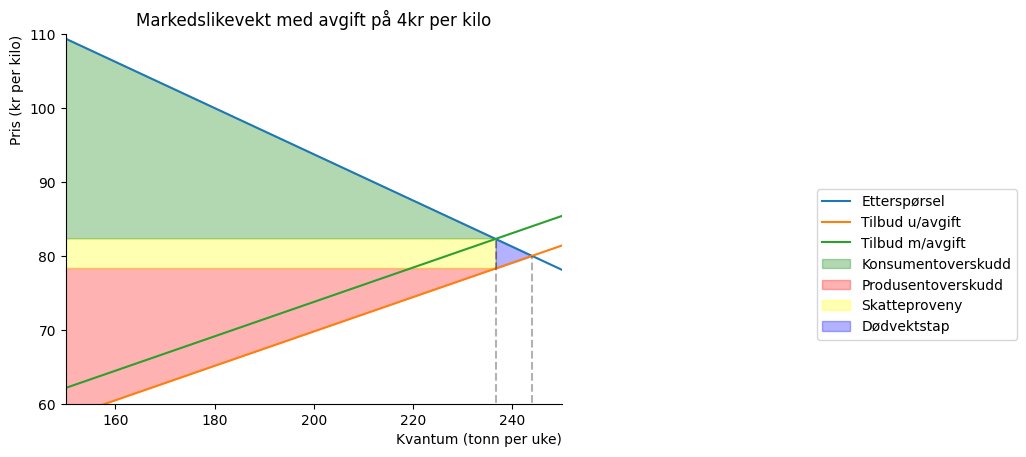

In [382]:
x_num=np.linspace(0.1,500,100)

equ_t4 = sp.Eq(demand(p),supply(p, 4))

x_eq_t4 = sp.solve(equ_t4,p)
x_eq_t4 = float(x_eq_t4[0])

p_eq_t4=demand(x_eq_t4)

def create_ax2():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (kr per kilo)', loc='top')
                ax.set_xlabel('Kvantum (tonn per uke)', loc='right')
                ax.set(xlim=(150,250))
                ax.set(ylim=(60,110))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

#skaper figur med funksjonen vår ovenfor
fig, ax = create_ax2()

#plotter funksjonen
ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')
ax.plot(x_num, supply(x_num, 4), label='Tilbud m/avgift')

#tittel
ax.set_title('Markedslikevekt med avgift på 4kr per kilo')

q2 = np.linspace(0,x_eq_t4,100)
q3 = np.linspace(x_eq_t0,x_eq_t4,100)

# #vertikallinjer for å markere likevekt.
ax.vlines(x_eq_t4, 0, demand(x_eq_t4), color = 'black',linestyle = 'dashed', alpha=0.3)
ax.vlines(x_eq_t0, 0, demand(x_eq_t0), color = 'black',linestyle = 'dashed', alpha=0.3)

#fyller inn konsument og produsent overskudd
ax.fill_between(q2,p_eq_t4,demand(q2), color = 'green',alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q2,supply(q2, 0),p_eq_t4-4, color = 'red',alpha = 0.3,label='Produsentoverskudd')
ax.fill_between(q2,p_eq_t4,p_eq_t4-4, color = 'yellow', alpha = 0.3,label='Skatteproveny')
ax.fill_between(q3,supply(q3, 0),demand(q3), color = 'blue',alpha = 0.3,label='Dødvektstap')

#legende
ax.legend(bbox_to_anchor=(1.5,0.6))

In [383]:
#calculate producer surplus, consumer surplus, tax proveny and deadweight loss

#producer surplus without tax
prod_surplus_t0 = sp.integrate(p_eq_t0-supply(p, 0),(p,0,x_eq_t0))
#konsumer surplus without tax
cons_surplus_t0 =sp.integrate(demand(p)-p_eq_t0,(p,0,x_eq_t0))
#production surplus with t=4
prod_surplus_t4 = sp.integrate(p_eq_t4 - 4 - supply(p, 0), (p, 0, x_eq_t4)) 
#konsumer surplus with t=4
cons_surplus_t4 = sp.integrate(demand(p)-p_eq_t4, (p, 0, x_eq_t4)) 
#tax proveny with t=4
skatteproveny = sp.integrate(4, (p, 0, x_eq_t4))
#deadweight loss
dødvektstap = sp.integrate(demand(p) - supply(p, 0), (p, x_eq_t4, x_eq_t0))

tbl=f"""
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris:      | ${p_eq_t0 }$           | ${round(p_eq_t4, 2)}$      | ${round(p_eq_t4 - p_eq_t0, 2)}$   |
| Produsentpris:      | ${p_eq_t0 }$           | ${round(p_eq_t4, 2)-4 }$   | ${round(p_eq_t4-4 - p_eq_t0, 2)}$ |
| Kvantum:            | ${round(x_eq_t0, 2)}$  | ${round(x_eq_t4, 2)}$      |  ${round(x_eq_t4 - x_eq_t0, 2)}$  |
| Konsumentoverskudd: | ${round(cons_surplus_t0, 2)}$ |${round(cons_surplus_t4, 2)}$  |  ${round(cons_surplus_t4 - cons_surplus_t0, 2)}$ |
| Produsentoverskudd: | ${round(prod_surplus_t0, 2)}$ | ${round(prod_surplus_t4, 2)}$ |  ${round(prod_surplus_t4 - prod_surplus_t0, 2)}$ |
| KO + PO:            |  ${round(prod_surplus_t0 + cons_surplus_t0, 2)}$    | ${round(prod_surplus_t4 + cons_surplus_t4, 2)}$| ${round((round(prod_surplus_t4 + cons_surplus_t4, 2)) - (round(prod_surplus_t0 + cons_surplus_t0, 2)), 2)}$ |
| Skatteproveny      :| ${0}$                  |${round(skatteproveny, 2)}$ | ${round(skatteproveny, 2) - 0}$   |
| Dødvektstap:        |${0}$                   | ${round(dødvektstap, 2)}$  | ${round(dødvektstap, 2) - 0}$     |
"""
display(Markdown(tbl))


|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris:      | $80.0$           | $82.29$      | $2.29$   |
| Produsentpris:      | $80.0$           | $78.29$   | $-1.71$ |
| Kvantum:            | $244.0$  | $236.66$      |  $-7.34$  |
| Konsumentoverskudd: | $9302.50$ |$8751.34$  |  $-551.16$ |
| Produsentoverskudd: | $6922.79$ | $6512.63$ |  $-410.16$ |
| KO + PO:            |  $16225.29$    | $15263.97$| $-961.32$ |
| Skatteproveny      :| $0$                  |$946.65$ | $946.65$   |
| Dødvektstap:        |$0$                   | $14.68$  | $14.68$     |
